## Real Case "SMALL DATA"

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/img/tom1.png' width=900>

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/img/tom2.png' width=900>

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#!wget https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/realcase/dataset_costi.xlsx

#Target colonna "costi anno 2020"

In [4]:
path = 'https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/realcase/dataset_costi.xlsx'

<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/pandas_.png' width=500>

In [5]:
# Step 1 Carichiamo il datset su un Dataframe
df = pd.read_excel(path)
df

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,...,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,...,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,...,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,...,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,...,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,...,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,n.d.,n.d.,0,n.d.,n.d.,1500,n.d.,...,28599,8175,18615,0,n.d.,n.d.,0,n.d.,n.d.,Produ
7920,8021,company8021,80757,n.d.,n.d.,0,n.d.,n.d.,1500,n.d.,...,28600,8176,18616,0,n.d.,n.d.,0,n.d.,n.d.,Produ
7921,8022,company8022,74478,n.d.,n.d.,7000,n.d.,n.d.,2529,n.d.,...,28601,8177,18617,0,n.d.,n.d.,0,n.d.,n.d.,Produ
7922,8023,company8023,0,n.d.,n.d.,0,n.d.,n.d.,0,n.d.,...,28602,8178,18618,5253,n.d.,n.d.,303714,n.d.,n.d.,Produ


In [6]:
# Step 2: Verifichiamo il dtypes, oopss... funziona solo per un numero ridotto di colonne, pazienza... 

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7924 entries, 0 to 7923
Columns: 171 entries, index to var159
dtypes: int64(68), object(103)
memory usage: 10.3+ MB


In [7]:
# Step 3: Verifichiamo le mediane delle colonne numeriche
df.median(numeric_only=True)

index                 4062.5
costi anno 2020    1611384.0
var3                     0.0
var6                 13038.0
var9                303505.0
                     ...    
Numero CCIAA         24641.5
Codice fiscale        4217.5
Partita IVA          14657.5
var153                   0.0
var156              102919.5
Length: 68, dtype: float64

In [8]:
df.median(numeric_only=True).sort_values()

var81                    0.0
var153                   0.0
var82                    0.0
var83                    0.0
var60                    0.0
                     ...    
var99               834556.5
var66               864360.5
var51              1446569.0
costi anno 2020    1611384.0
var93              1672529.5
Length: 68, dtype: float64

In [151]:
#ci sono delle stringhe in var1 var2 pur essendo numeriche, come mai??
#inoltre anche se non numeriche Numero CCIAA e Codice fiscale e PIVA non sono numeri che posso utilizzare, bensì ID
df['var2'].value_counts()


n.d.       751
0          159
188805       2
491378       2
584036       2
          ... 
4015463      1
4204346      1
3390674      1
3778266      1
169365       1
Name: var2, Length: 7012, dtype: int64

In [152]:
## Trovato!! Abbiamo il nostro primo n.d. che sporca la colonna
# Step 4: Spstituiamo su tutto il dataset n.d. con 0

df = df.replace({'n.d.':0})
df

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,...,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,...,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,...,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,...,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,...,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,...,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,0,0,0,0,0,1500,0,...,28599,8175,18615,0,0,0,0,0,0,Produ
7920,8021,company8021,80757,0,0,0,0,0,1500,0,...,28600,8176,18616,0,0,0,0,0,0,Produ
7921,8022,company8022,74478,0,0,7000,0,0,2529,0,...,28601,8177,18617,0,0,0,0,0,0,Produ
7922,8023,company8023,0,0,0,0,0,0,0,0,...,28602,8178,18618,5253,0,0,303714,0,0,Produ


In [153]:
# check Nan values
df.isnull().sum().sort_values(ascending=False) # ce ne sono 2, le droppo

Indirizzo sede legale    2
index                    0
var105                   0
var107                   0
var108                   0
                        ..
var56                    0
var57                    0
var58                    0
var59                    0
var159                   0
Length: 171, dtype: int64

In [154]:
# Step 5: Sono solo 2 righe, possiamo droppare i Nan
df = df.dropna()
df

,index,Ragione sociale,costi anno 2020,var1,var2,var3,var4,var5,var6,var7,...,Numero CCIAA,Codice fiscale,Partita IVA,var153,var154,var155,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,0,0,0,51344312,61401789,...,20680,256,10696,84978,318158,318158,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,0,0,0,1037776,1391301,...,20681,257,10697,1583,1583,1588,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,0,0,0,737000,707000,...,20682,258,10698,1801000,1761000,1171000,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,0,0,0,39316,5715,...,20683,259,10699,890646,0,0,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,0,0,0,6571906,3613836,...,20684,260,10700,0,0,0,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,0,0,0,0,0,1500,0,...,28599,8175,18615,0,0,0,0,0,0,Produ
7920,8021,company8021,80757,0,0,0,0,0,1500,0,...,28600,8176,18616,0,0,0,0,0,0,Produ
7921,8022,company8022,74478,0,0,7000,0,0,2529,0,...,28601,8177,18617,0,0,0,0,0,0,Produ
7922,8023,company8023,0,0,0,0,0,0,0,0,...,28602,8178,18618,5253,0,0,303714,0,0,Produ


In [155]:
# adesso la mediana comprende anche var2 e var3 e tutte le colonne che prima venivano viste come object
df.median(numeric_only=True)

index                 4062.5
costi anno 2020    1611384.0
var1               1478972.0
var2               1349412.5
var3                     0.0
                     ...    
var154                   0.0
var155                   0.0
var156              102919.5
var157               85859.0
var158               65776.0
Length: 163, dtype: float64

In [156]:
# Step 6: Cerchiamo tutte le colonne dove la MEDIANA è ==0
median_values = df.median(numeric_only=True)
columns_with_zero_median = median_values.where(median_values == 0).dropna().index
columns_with_zero_median = columns_with_zero_median.to_list()
len(columns_with_zero_median)

## Droppiamo questa liste di colonne
df = df.drop(columns_with_zero_median,axis=1)
df

,index,Ragione sociale,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,...,Indirizzo sede legale - Comune,Provincia,Indirizzo sede legale - Regione,Numero CCIAA,Codice fiscale,Partita IVA,var156,var157,var158,var159
0,101,company101,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,...,Nerviano,Milano,Lombardia,20680,256,10696,25290616,24108358,24535319,Produ
1,102,company102,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,...,Milano,Milano,Lombardia,20681,257,10697,14133394,10404117,12898505,Produ
2,103,company103,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,...,Valle Lomellina,Pavia,Lombardia,20682,258,10698,31861000,22494000,24687000,Produ
3,104,company104,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,...,Spilamberto,Modena,Emilia-Romagna,20683,259,10699,1000000,0,1188439,Produ
4,105,company105,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,...,Moretta,Cuneo,Piemonte,20684,260,10700,27325115,24037285,24492237,Produ
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,8020,company8020,81879,0,0,1500,0,0,0,0,...,Monza,Monza e della Brianza,Lombardia,28599,8175,18615,0,0,0,Produ
7920,8021,company8021,80757,0,0,1500,0,0,0,0,...,Monza,Monza e della Brianza,Lombardia,28600,8176,18616,0,0,0,Produ
7921,8022,company8022,74478,0,0,2529,0,0,0,0,...,Santa Lucia del Mela,Messina,Sicilia,28601,8177,18617,0,0,0,Produ
7922,8023,company8023,0,0,0,0,0,0,16295937,0,...,Reggio nell'Emilia,Reggio nell'Emilia,Emilia-Romagna,28602,8178,18618,303714,0,0,Produ


In [157]:
df.columns

Index(['index', 'Ragione sociale', 'costi anno 2020', 'var1', 'var2', 'var6',
       'var7', 'var8', 'var9', 'var10',
       ...
       'Indirizzo sede legale - Comune', 'Provincia',
       'Indirizzo sede legale - Regione', 'Numero CCIAA', 'Codice fiscale',
       'Partita IVA', 'var156', 'var157', 'var158', 'var159'],
      dtype='object', length=108)

In [158]:
#check colonne stringhe
for col in df.columns.to_list():
    if df[col].dtype == 'object':
        print(col)
    else:
        pass

Ragione sociale
ATECO 2007
codice
Indirizzo sede legale
Indirizzo sede legale - Codice postale
Indirizzo sede legale - Comune
Provincia
Indirizzo sede legale - Regione
var159


In [159]:
# rimuovo le variabili specifiche del singolo observation e quelle categoriche come prima approssimazione

id_riga = ['index', 'Ragione sociale', 'Indirizzo sede legale - Comune', 'Provincia','Indirizzo sede legale - Regione', 
           'Numero CCIAA', 'Codice fiscale','Partita IVA','var159','ATECO 2007\ncodice','Indirizzo sede legale', 'Indirizzo sede legale - Codice postale'
           ]

df = df.drop(id_riga,axis=1)
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var15,...,var143,var147,var148,var149,var150,var151,var152,var156,var157,var158
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,...,4594656,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,...,1304576,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,...,1450000,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,...,258220,478455,494325,473999,60,60,65,1000000,0,1188439
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,...,943092,966348,1243727,869544,171,141,132,27325115,24037285,24492237
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,81879,0,0,1500,0,0,0,0,0,0,...,0,20613,0,0,10,0,0,0,0,0
7920,80757,0,0,1500,0,0,0,0,0,0,...,0,7903,0,0,29,0,0,0,0,0
7921,74478,0,0,2529,0,0,0,0,0,0,...,0,-669,0,0,1,0,0,0,0,0
7922,0,0,0,0,0,0,16295937,0,0,39881,...,0,-1035385,0,0,0,0,0,303714,0,0


In [160]:
## CHECK ZERI per righe
# aggiungo il conteggio degli zeri per riga e li sommo
# nella colonna Total_Zeros

df['Total_Zeros'] = (df == 0).sum(axis=1) 
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var15,...,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,...,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319,2
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,...,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505,0
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,...,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000,1
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,...,478455,494325,473999,60,60,65,1000000,0,1188439,2
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,...,966348,1243727,869544,171,141,132,27325115,24037285,24492237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7919,81879,0,0,1500,0,0,0,0,0,0,...,20613,0,0,10,0,0,0,0,0,75
7920,80757,0,0,1500,0,0,0,0,0,0,...,7903,0,0,29,0,0,0,0,0,75
7921,74478,0,0,2529,0,0,0,0,0,0,...,-669,0,0,1,0,0,0,0,0,74
7922,0,0,0,0,0,0,16295937,0,0,39881,...,-1035385,0,0,0,0,0,303714,0,0,72


In [161]:
df.shape[1] # numero colonne

97

In [162]:
threshold_zeri_riga = 0.25 * df.shape[1] # tengo solo le righe con max 25% di zeri totali

# Drop rows where 'Total_Zeros' is greater than the threshold
df = df[df['Total_Zeros'] <= threshold_zeri_riga].reset_index(drop=True)
df

,costi anno 2020,var1,var2,var6,var7,var8,var9,var10,var11,var15,...,var147,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros
0,144205134,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,...,-3027241,1534078,3813249,229,214,207,25290616,24108358,24535319,2
1,140165127,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,...,1924469,2124721,2204557,454,411,456,14133394,10404117,12898505,0
2,145190000,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,...,-803000,3170000,2408000,116,165,168,31861000,22494000,24687000,1
3,112760368,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,...,478455,494325,473999,60,60,65,1000000,0,1188439,2
4,171980718,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,...,966348,1243727,869544,171,141,132,27325115,24037285,24492237,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6468,30000,0,0,120804,150689,184664,1346693,1512073,1591765,1041499,...,-7192,-42112,-64651,1,1,1,629680,689997,793990,15
6469,7369,0,0,652842,533673,579484,694890,630706,389427,16583,...,-1065954,-928899,-224535,3,3,0,1733333,2266666,996294,12
6470,0,0,0,59232,0,0,3033737,3645899,3708988,754,...,10511,157930,168111,0,1,1,0,0,650000,14
6471,0,0,0,184237,182677,182677,1835816,1835816,1835816,747,...,144768,133586,135861,0,0,0,425449,609172,1174010,23


In [163]:
df['costi anno 2020']

0       144205134
1       140165127
2       145190000
3       112760368
4       171980718
          ...    
6468        30000
6469         7369
6470            0
6471            0
6472            0
Name: costi anno 2020, Length: 6473, dtype: int64

In [165]:
## Sposto la TARGET alla fine, per comodità con iLOC
df['costi'] = df['costi anno 2020']
df = df.drop(columns='costi anno 2020')
df

,var1,var2,var6,var7,var8,var9,var10,var11,var15,var16,...,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros,costi
0,147823139,148193655,51344312,61401789,71387976,23064675,20882011,14244395,14562964,14352577,...,1534078,3813249,229,214,207,25290616,24108358,24535319,2,144205134
1,147562322,163251010,1037776,1391301,1602930,23503659,22973259,20946238,1850794,1693511,...,2124721,2204557,454,411,456,14133394,10404117,12898505,0,140165127
2,147562000,142652000,737000,707000,745000,51250000,51604000,50992000,69000,66000,...,3170000,2408000,116,165,168,31861000,22494000,24687000,1,145190000
3,147067625,140160124,39316,5715,8015,5258584,5491288,5735791,25917,25917,...,494325,473999,60,60,65,1000000,0,1188439,2,112760368
4,145273739,127413305,6571906,3613836,3218188,65670888,56917531,51856050,2324116,2070401,...,1243727,869544,171,141,132,27325115,24037285,24492237,0,171980718
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6468,0,0,120804,150689,184664,1346693,1512073,1591765,1041499,1041499,...,-42112,-64651,1,1,1,629680,689997,793990,15,30000
6469,0,0,652842,533673,579484,694890,630706,389427,16583,16589,...,-928899,-224535,3,3,0,1733333,2266666,996294,12,7369
6470,0,0,59232,0,0,3033737,3645899,3708988,754,754,...,157930,168111,0,1,1,0,0,650000,14,0
6471,0,0,184237,182677,182677,1835816,1835816,1835816,747,747,...,133586,135861,0,0,0,425449,609172,1174010,23,0


## EDA

In [166]:
df.corr()

,var1,var2,var6,var7,var8,var9,var10,var11,var15,var16,...,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros,costi
var1,1.000000,0.987545,0.134735,0.129156,0.233324,0.647790,0.633806,0.619816,0.411171,0.381469,...,0.310542,0.388855,0.635837,0.622646,0.636266,0.453859,0.484476,0.532184,-0.356267,0.986924
var2,0.987545,1.000000,0.182926,0.193002,0.265700,0.653295,0.640063,0.628021,0.412161,0.385211,...,0.286832,0.377601,0.628600,0.617928,0.635112,0.476233,0.515647,0.536397,-0.350151,0.979380
var6,0.134735,0.182926,1.000000,0.873948,0.813744,0.189481,0.182560,0.164998,0.334073,0.129470,...,0.030358,0.105984,0.145627,0.139467,0.134256,0.759380,0.482054,0.243546,-0.033193,0.175837
var7,0.129156,0.193002,0.873948,1.000000,0.725457,0.226067,0.216400,0.193520,0.218240,0.141494,...,-0.030381,0.083985,0.151547,0.146893,0.135110,0.658063,0.639378,0.317756,-0.034129,0.183976
var8,0.233324,0.265700,0.813744,0.725457,1.000000,0.263996,0.264811,0.244578,0.360992,0.209443,...,0.024691,0.080328,0.195899,0.189211,0.189046,0.713685,0.453388,0.439864,-0.067247,0.241717
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
var156,0.453859,0.476233,0.759380,0.658063,0.713685,0.572414,0.558866,0.533768,0.452505,0.296037,...,0.101244,0.166867,0.344093,0.331052,0.332867,1.000000,0.799261,0.700886,-0.211605,0.478026
var157,0.484476,0.515647,0.482054,0.639378,0.453388,0.653302,0.642611,0.610340,0.321045,0.334645,...,0.068317,0.140524,0.373897,0.363942,0.363830,0.799261,1.000000,0.776722,-0.241193,0.521142
var158,0.532184,0.536397,0.243546,0.317756,0.439864,0.682049,0.684552,0.681441,0.350470,0.374251,...,0.047473,0.089335,0.384217,0.376627,0.386227,0.700886,0.776722,1.000000,-0.265157,0.532083
Total_Zeros,-0.356267,-0.350151,-0.033193,-0.034129,-0.067247,-0.298061,-0.292855,-0.282878,-0.130242,-0.126241,...,-0.115092,-0.150628,-0.260973,-0.254773,-0.259016,-0.211605,-0.241193,-0.265157,1.000000,-0.357000


<AxesSubplot: >

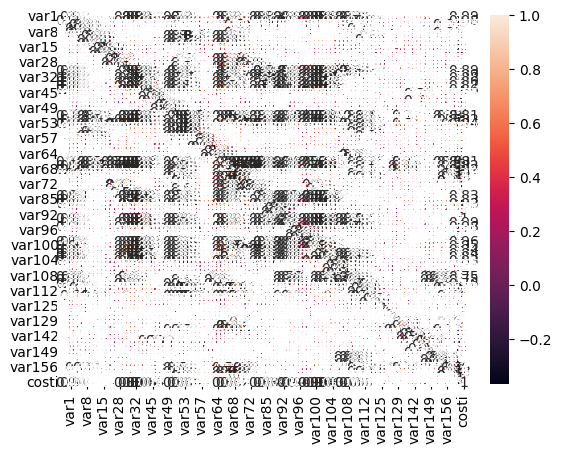

In [44]:
import seaborn as sns

sns.heatmap(df.corr(), annot=True)

In [167]:
df.describe()

,var1,var2,var6,var7,var8,var9,var10,var11,var15,var16,...,var148,var149,var150,var151,var152,var156,var157,var158,Total_Zeros,costi
count,6.473000e+03,6.473000e+03,6.473000e+03,6.473000e+03,6.473000e+03,6.473000e+03,6.473000e+03,6.473000e+03,6.473000e+03,6.473000e+03,...,6.473000e+03,6.473000e+03,6473.000000,6473.000000,6473.000000,6.473000e+03,6.473000e+03,6.473000e+03,6473.000000,6.473000e+03
mean,8.443188e+06,8.012401e+06,3.849456e+05,3.367663e+05,2.730304e+05,2.358699e+06,2.245223e+06,2.143724e+06,3.148280e+05,2.865399e+05,...,1.789934e+05,1.818910e+05,23.263247,22.823884,21.924610,1.206466e+06,1.119310e+06,1.046231e+06,8.729337,8.613648e+06
std,1.745212e+07,1.684501e+07,7.190526e+06,5.847395e+06,2.816792e+06,6.240446e+06,6.001198e+06,5.841541e+06,2.091959e+06,1.927707e+06,...,1.244736e+06,1.038255e+06,49.102683,49.053856,46.640422,4.825622e+06,3.964091e+06,3.348250e+06,6.769581,1.782379e+07
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,-6.080911e+07,-3.185507e+07,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,6.959380e+05,6.319420e+05,1.352000e+03,1.298000e+03,1.516000e+03,9.359900e+04,8.910400e+04,8.087800e+04,0.000000e+00,0.000000e+00,...,1.479000e+03,1.246000e+03,5.000000,5.000000,5.000000,8.559000e+03,5.767000e+03,5.140000e+02,3.000000,7.081640e+05
50%,2.131702e+06,2.041619e+06,1.808200e+04,1.722700e+04,1.621800e+04,4.580000e+05,4.320280e+05,4.022180e+05,1.215000e+03,1.177000e+03,...,1.992600e+04,1.845100e+04,11.000000,11.000000,10.000000,1.590050e+05,1.500000e+05,1.403590e+05,8.000000,2.181069e+06
75%,7.420600e+06,6.839651e+06,1.000210e+05,9.192700e+04,8.847800e+04,1.853109e+06,1.815090e+06,1.710568e+06,1.744900e+04,1.597700e+04,...,1.213430e+05,1.062540e+05,22.000000,22.000000,21.000000,7.948150e+05,7.719590e+05,7.627570e+05,14.000000,7.429164e+06
max,1.478231e+08,1.954054e+08,3.949990e+08,4.236760e+08,1.218370e+08,1.822085e+08,1.819357e+08,1.819572e+08,5.580400e+07,5.208281e+07,...,1.384342e+07,2.333264e+07,1384.000000,1307.000000,1244.000000,2.025610e+08,1.872810e+08,1.169022e+08,24.000000,1.754113e+08


In [168]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6473 entries, 0 to 6472
Data columns (total 97 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   var1         6473 non-null   int64
 1   var2         6473 non-null   int64
 2   var6         6473 non-null   int64
 3   var7         6473 non-null   int64
 4   var8         6473 non-null   int64
 5   var9         6473 non-null   int64
 6   var10        6473 non-null   int64
 7   var11        6473 non-null   int64
 8   var15        6473 non-null   int64
 9   var16        6473 non-null   int64
 10  var17        6473 non-null   int64
 11  var27        6473 non-null   int64
 12  var28        6473 non-null   int64
 13  var29        6473 non-null   int64
 14  var30        6473 non-null   int64
 15  var31        6473 non-null   int64
 16  var32        6473 non-null   int64
 17  var33        6473 non-null   int64
 18  var34        6473 non-null   int64
 19  var35        6473 non-null   int64
 20  var45   

In [169]:
X = df.iloc[:,0:-2] # Features tutte le 95variabili... perchè non -1? non voglio la colonna Total_Zeros che ho aggiunto per filtrare il threshold degli zeri riga
y = df.iloc[:,-1]     # Target
#or
#y = df['costi']

In [170]:
X.shape,y.shape

((6473, 95), (6473,))

In [171]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.3, 
                                                    random_state=667
                                                    )

In [172]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [173]:
model.intercept_

-9647.302343524992

In [174]:
model.coef_

array([ 1.27299289e-01,  8.05095183e-02, -2.64683744e-02,  4.37950150e-02,
       -2.30125423e-02, -1.01177061e-02,  6.19883482e-03,  8.23264146e-03,
       -1.04063552e-01,  9.67531720e-02,  4.40064619e-02, -7.56543804e-01,
        8.82252233e-01, -1.25308958e-01,  4.47499921e-03, -2.37942903e-02,
        2.30989760e-02,  2.14602768e-02,  1.36588608e-02, -2.53426628e-02,
       -1.84327973e-03, -8.27719180e-03,  4.26318363e-03, -4.52893260e-02,
       -3.11402181e-02,  7.64013538e-02,  2.18527210e-01, -2.78574354e-01,
        7.98746592e-02, -1.77267371e-01,  2.43395657e-01, -8.51971821e-02,
        9.03712361e-02, -9.28836817e-02, -7.41209073e-03, -1.08035490e-01,
        1.55887096e-01, -1.48052508e-01, -2.33320234e-01,  3.00460882e-01,
       -9.89830035e-02,  2.34888994e-03,  7.49726513e-03, -1.00081871e-02,
       -4.48649222e-03,  3.37562856e-03, -2.49434661e-03, -1.62822820e-02,
       -9.76081312e-04,  2.18078100e-02, -2.50562835e-01,  3.16305192e-01,
       -1.15485937e-01,  

In [175]:
y_pred = model.predict(X_test)

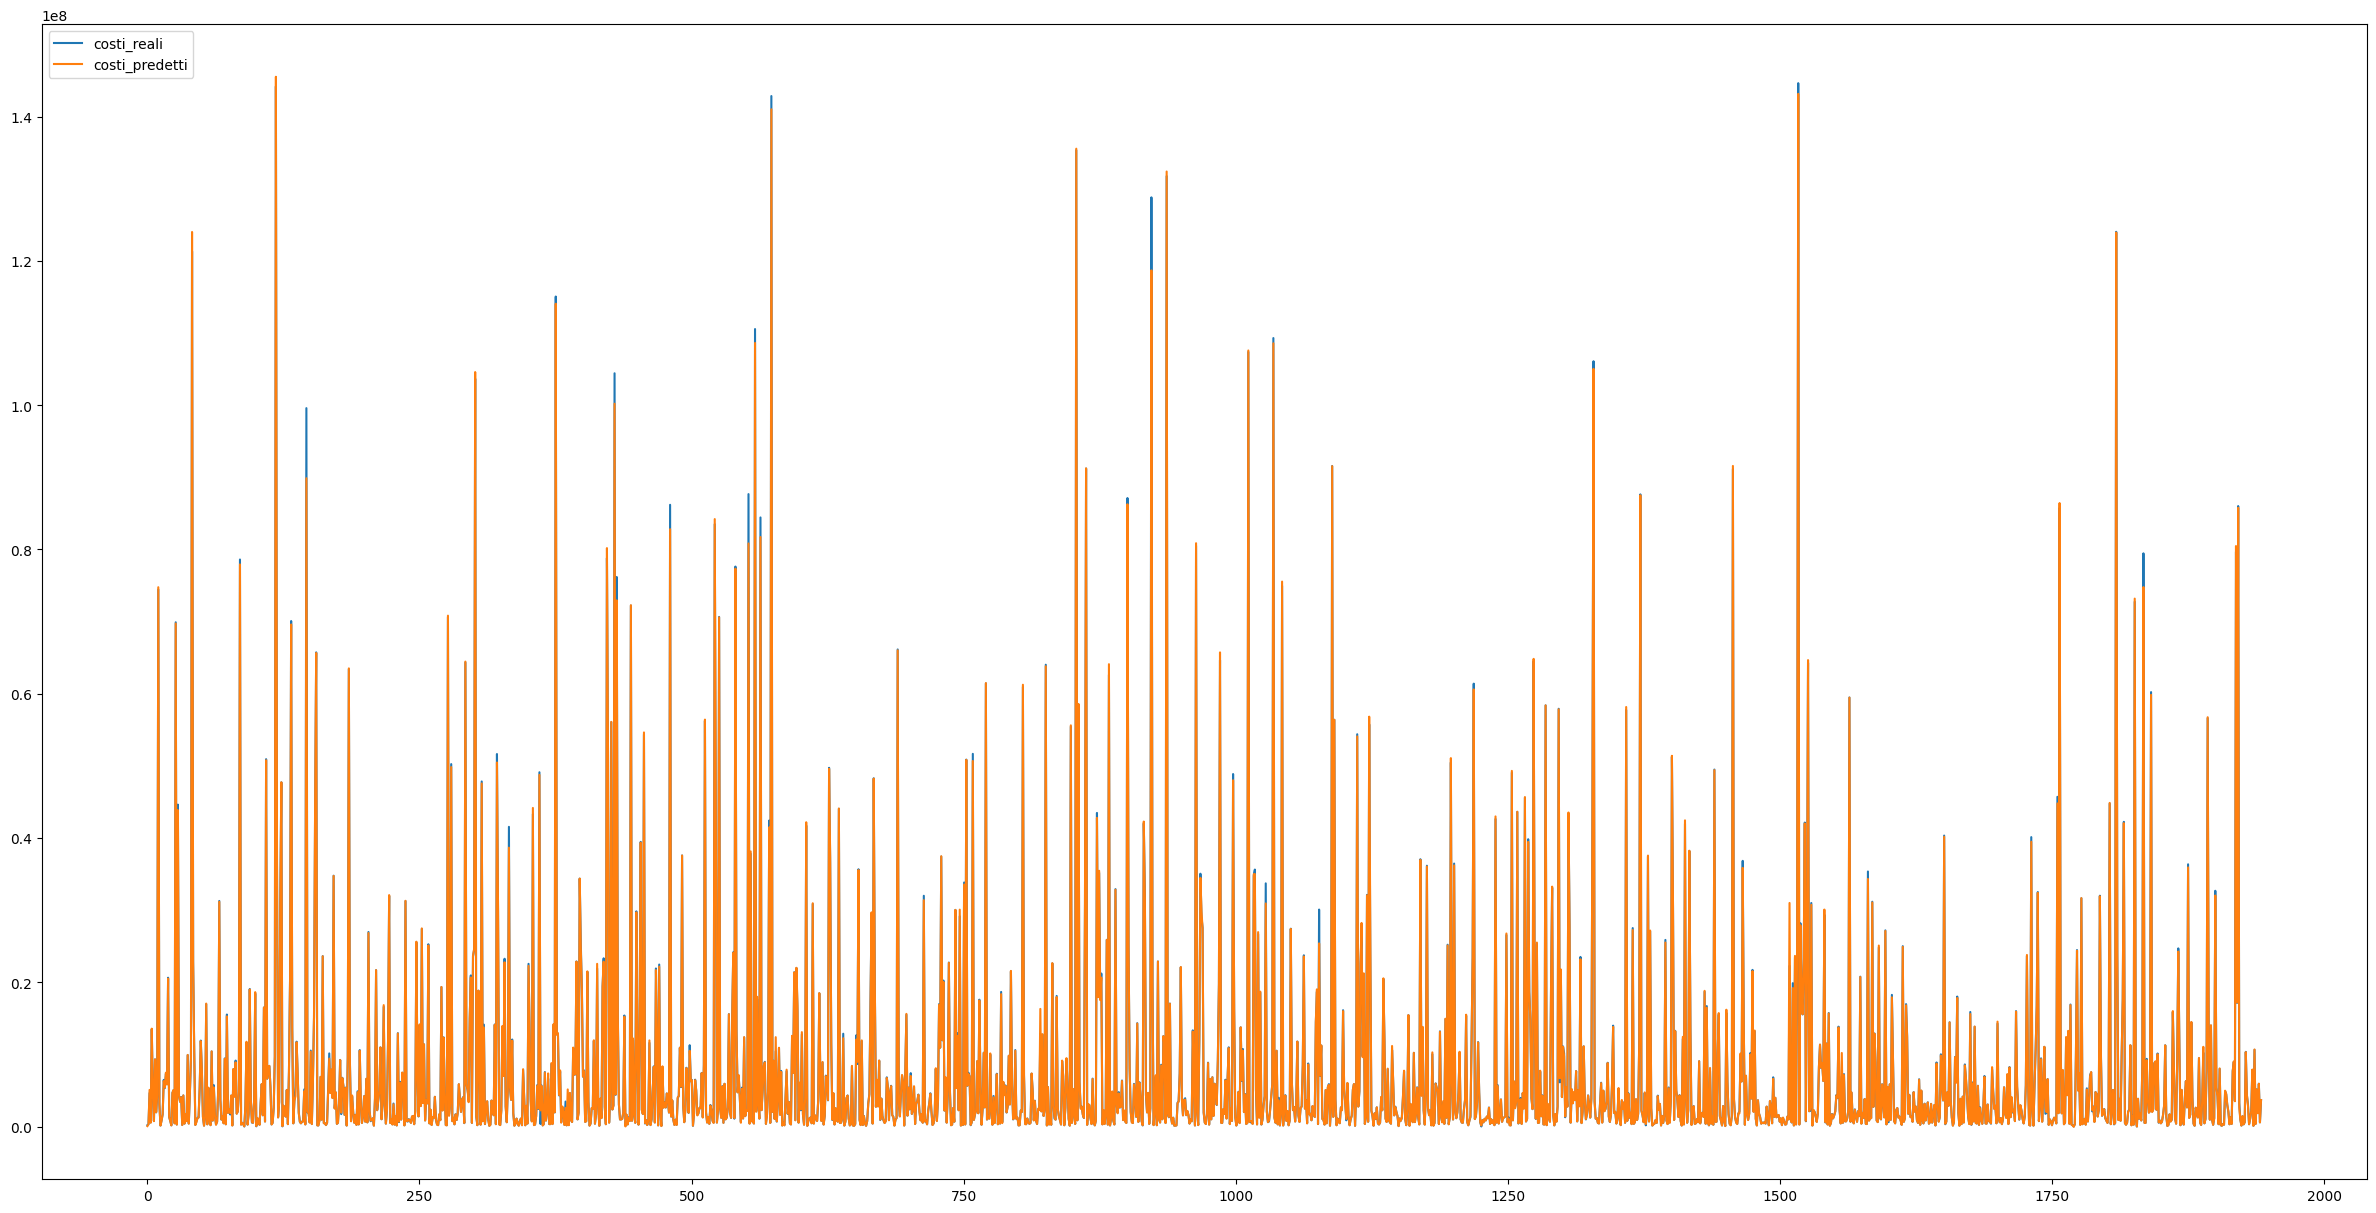

In [176]:
import numpy as np
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)


plt.figure(figsize=(30,15))
plt.plot(x, y_test, label='costi_reali')
plt.plot(x, y_pred, label='costi_predetti')
plt.legend(loc=2);

## Riduciamo il numero di variabili: "Feature Engineering"

In [55]:
# Al momento abbiamo 95 regressori!!!!!!! insostenibile

In [56]:
corrmat = df.corr()
corrmat.index.values

array(['var1', 'var2', 'var6', 'var7', 'var8', 'var9', 'var10', 'var11',
       'var15', 'var16', 'var17', 'var27', 'var28', 'var29', 'var30',
       'var31', 'var32', 'var33', 'var34', 'var35', 'var45', 'var46',
       'var47', 'var48', 'var49', 'var50', 'var51', 'var52', 'var53',
       'var54', 'var55', 'var56', 'var57', 'var58', 'var59', 'var63',
       'var64', 'var65', 'var66', 'var67', 'var68', 'var69', 'var70',
       'var71', 'var72', 'var78', 'var79', 'var84', 'var85', 'var86',
       'var90', 'var91', 'var92', 'var93', 'var94', 'var95', 'var96',
       'var97', 'var98', 'var99', 'var100', 'var101', 'var102', 'var103',
       'var104', 'var105', 'var106', 'var107', 'var108', 'var109',
       'var110', 'var111', 'var112', 'var113', 'var123', 'var124',
       'var125', 'var126', 'var127', 'var128', 'var129', 'var130',
       'var131', 'var141', 'var142', 'var143', 'var147', 'var148',
       'var149', 'var150', 'var151', 'var152', 'var156', 'var157',
       'var158', 'Total_Zero

In [57]:
def getCorrelatedFeature(corrdata, threshold):
    feature = []
    value = []
    
    for i,index in enumerate(corrdata.index):
        if abs(corrdata[index])> threshold:
            feature.append(index)
            value.append(corrdata[index])
            
    df = pd.DataFrame(data = value, index = feature, columns=['Corr Value'])
    return df

In [58]:
threshold_corr = 0.90
corr_value = getCorrelatedFeature(corrmat['costi'], threshold_corr)
corr_value

,Corr Value
var1,0.986924
var2,0.979380
var93,0.998298
var94,0.986097
var95,0.978431
var99,0.958574
var100,0.946392
var101,0.938322
costi,1.000000


In [59]:
df_rid = df[corr_value.index]
df_rid

,var1,var2,var93,var94,var95,var99,var100,var101,costi
0,147823139,148193655,145914503,148992105,149021406,85824629,86758885,83651116,144205134
1,147562322,163251010,142727898,150222876,166417107,102237238,113037130,131392006,140165127
2,147562000,142652000,148757000,153783000,148906000,117422000,111227000,108035000,145190000
3,147067625,140160124,119349203,145528364,143260149,105779603,129982682,121831610,112760368
4,145273739,127413305,174796438,148011089,130682792,149110551,119058121,106955719,171980718
...,...,...,...,...,...,...,...,...,...
6468,0,0,580433,505522,441838,0,0,0,30000
6469,0,0,196707,137271,126648,148366,47631,0,7369
6470,0,0,534634,597363,560580,163,206,1144,0
6471,0,0,230001,232342,231989,0,0,7,0


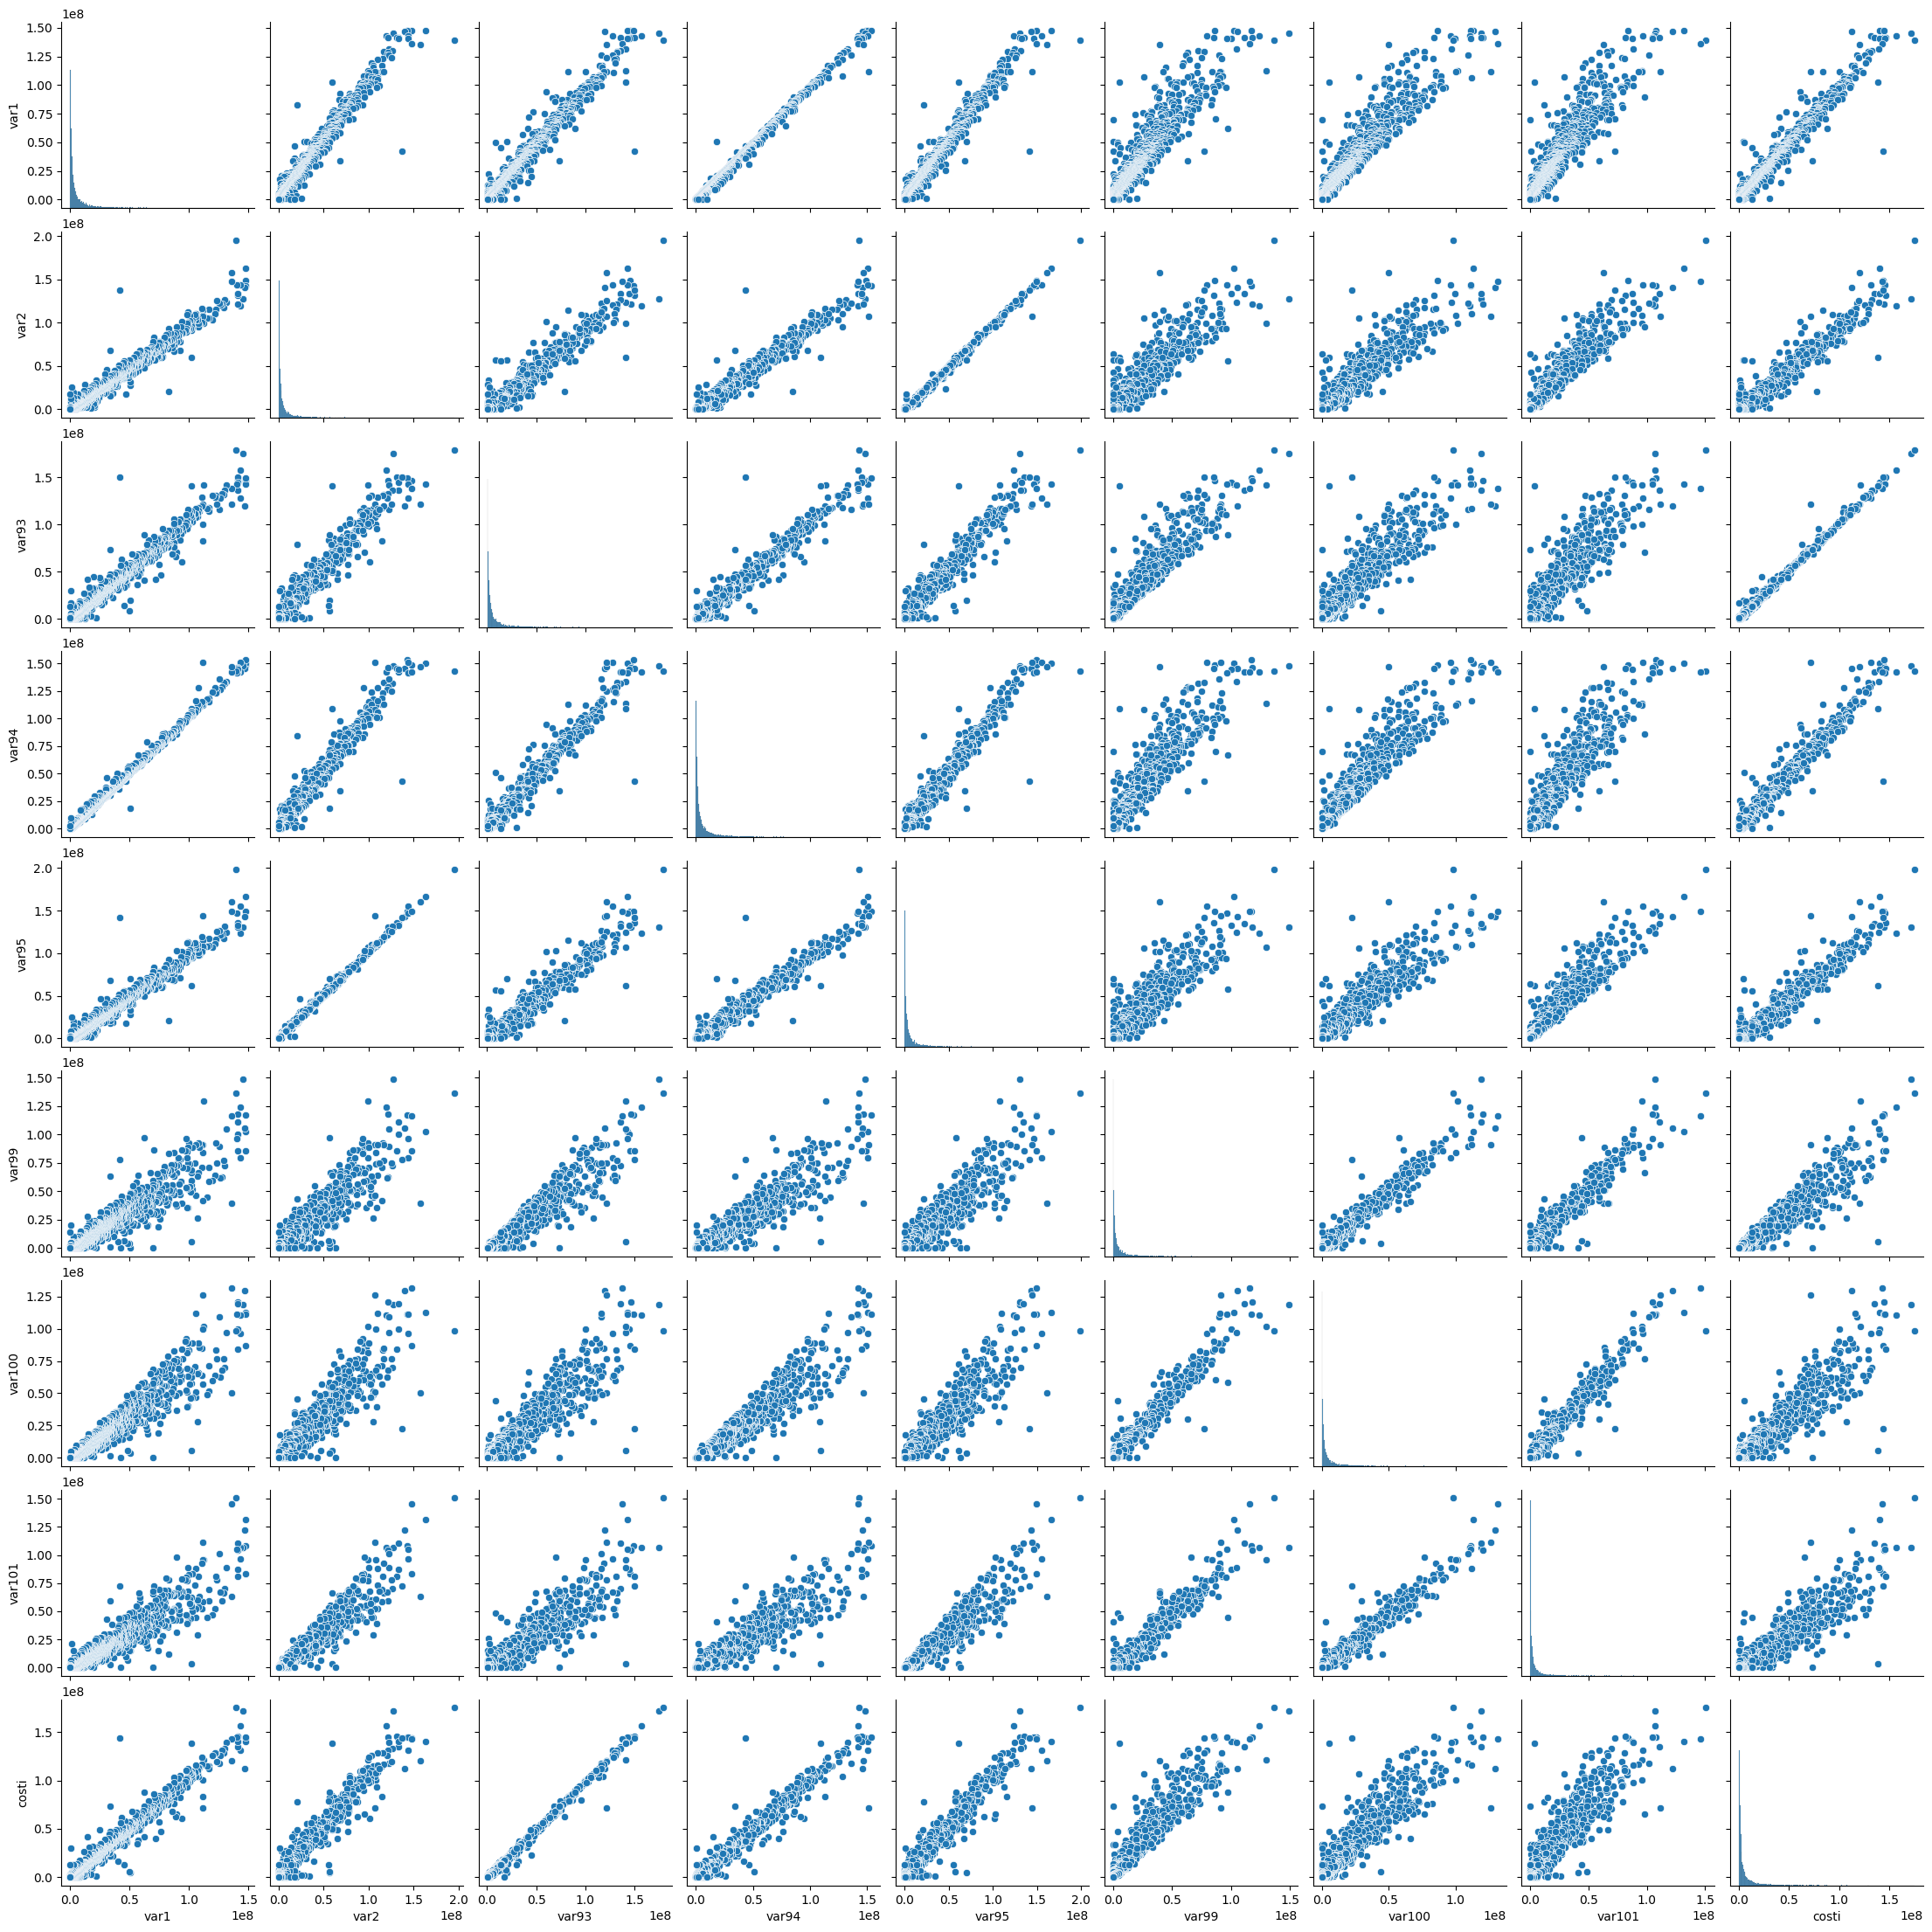

In [60]:
sns.pairplot(df_rid)

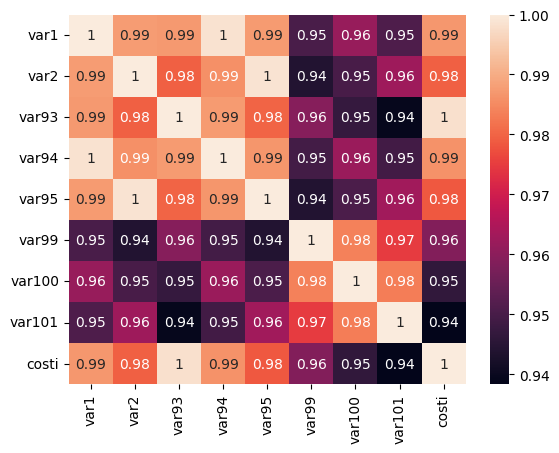

In [61]:
sns.heatmap(df_rid.corr(), annot=True);

In [62]:
X = df_rid.drop(columns=['costi'])
y = df_rid['costi']

In [63]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.3, 
                                                    random_state = 667
                                                    )

In [64]:
model_slim = LinearRegression()
model_slim.fit(X_train, y_train)

LinearRegression()

In [65]:
y_pred = model_slim.predict(X_test)

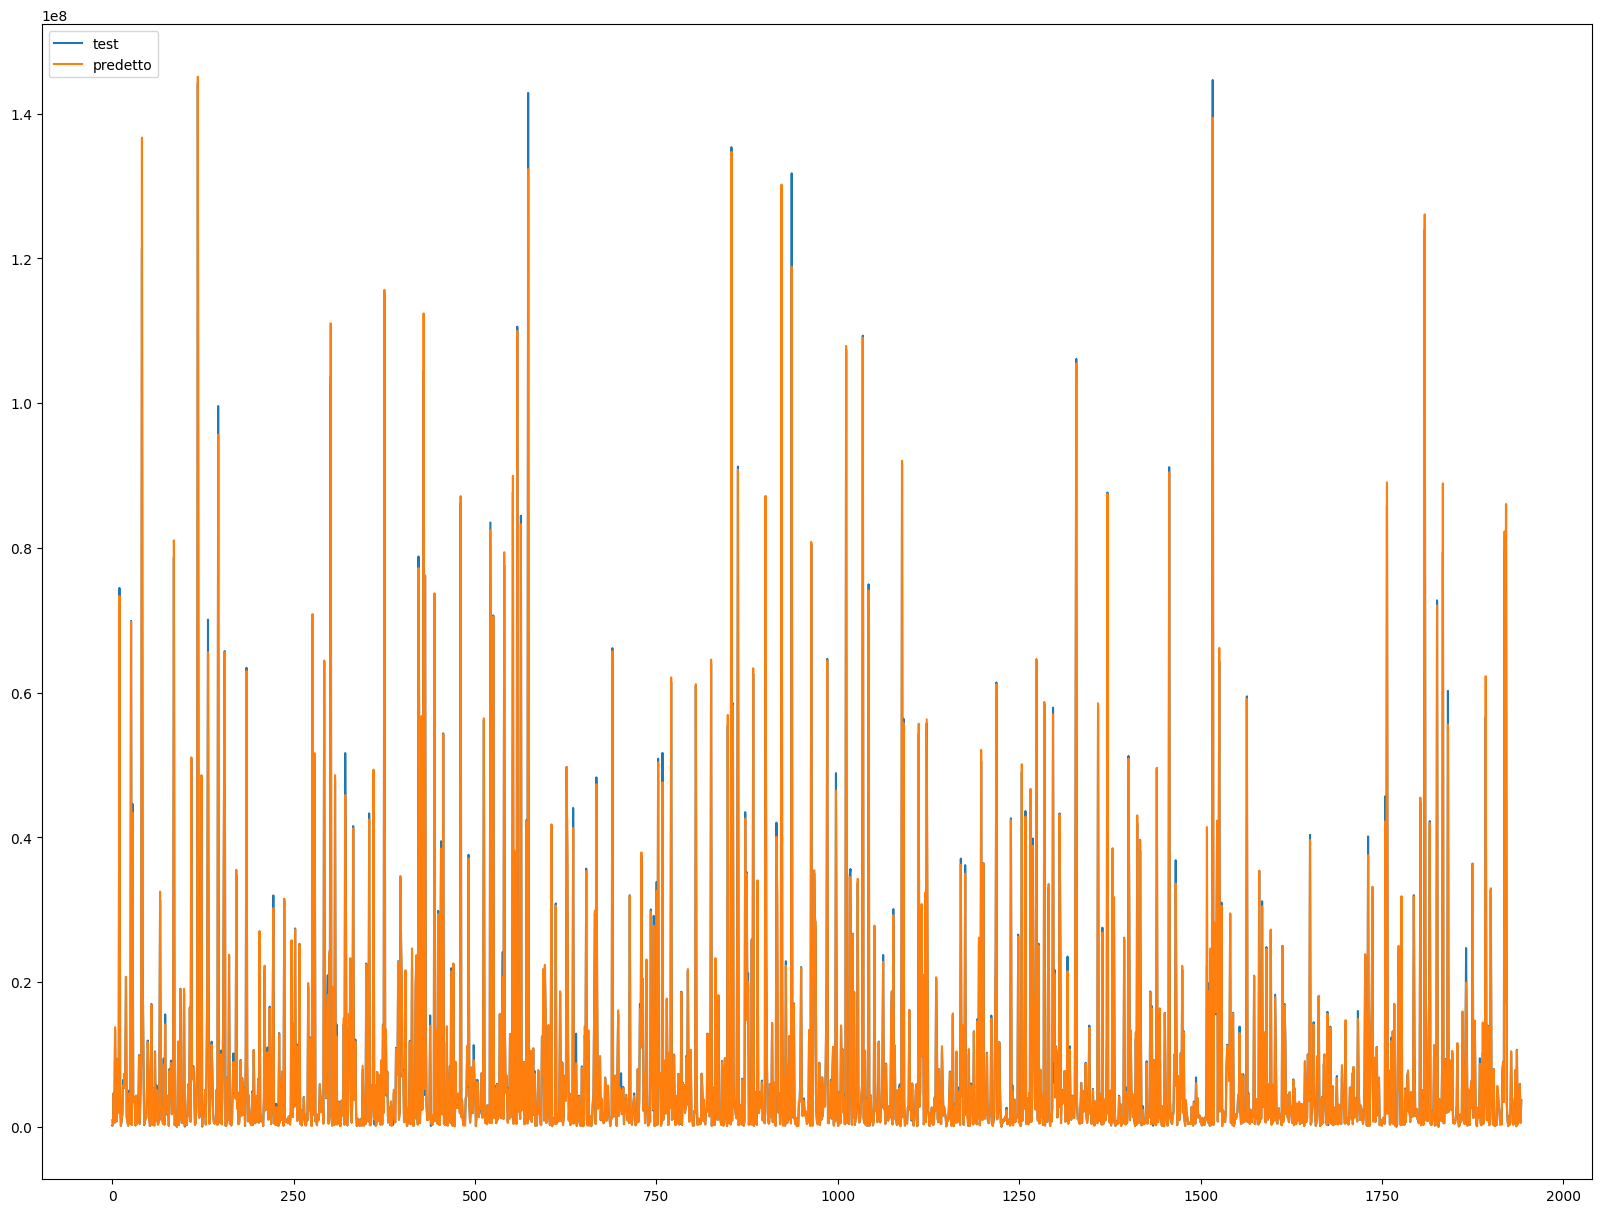

In [66]:
length = y_pred.shape[0] #  
x = np.linspace(0,length,length)

plt.figure(figsize=(20,15))
plt.plot(x, y_test, label='test')
plt.plot(x, y_pred, label='predetto')
plt.legend(loc=2);

In [67]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

r2score = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)

print('R2_score: ', round(r2score,4))
print('MAE: ', round(mae,2))
print('MSE: ', round(mse,2))
print('RMSE: ', round(rmse,2))

R2_score:  0.997
MAE:  256359.56
MSE:  896765855179.48
RMSE:  946977.22


In [68]:
import joblib

## to save a model
joblib.dump(model_slim,'regression_real_case8_input.pkl')

['regression_real_case8_input.pkl']

In [69]:
## to load model
loaded_model = joblib.load('regression_real_case8_input.pkl')
loaded_model

LinearRegression()

In [70]:
test = X.iloc[0:1].values[0].tolist()
test

[147823139,
 148193655,
 145914503,
 148992105,
 149021406,
 85824629,
 86758885,
 83651116]

In [71]:
#res = loaded_model.predict([[1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000,1000000000]])[0]
res = loaded_model.predict([test])[0]

round(res,2)

145090841.62

In [72]:
# intercetta
loaded_model.intercept_

-36589.43239347823

In [83]:
# Tabella per excel 
beta ={
        'variabile' : X.columns.to_list(),
        'pesi':loaded_model.coef_.tolist()
        }
tab = pd.DataFrame(beta)
tab

# costi = intercetta + 0.261505 * var1 + 0.572213 * var2 + 0.913673 * var93 + (-0.183165) * var94 + (-0.561466) * var95 + 0.108055 * var99 + (-0.057827) * var100 + (-0.059076) * var101

,variabile,pesi
0,var1,0.261505
1,var2,0.572213
2,var93,0.913673
3,var94,-0.183165
4,var95,-0.561466
5,var99,0.108055
6,var100,-0.057827
7,var101,-0.059076


<img src='https://frenzy86.s3.eu-west-2.amazonaws.com/python/data/didit.png' width=650>